Standart olan kütüphaneleri import etme, veri setlerini çağırma ve veri setinde gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

Fakirlik oranı ile liseden mezun olma oranlarının karşılaştırılması üzerine görselleştirme gerçekleştirelim.

In [5]:
#barPlot1 dökümanı
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

In [6]:
#barPlot2 dökümanı
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

In [7]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])

In [8]:
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)

In [9]:
data.sort_values('area_poverty_ratio',inplace=True)

Violin Plot, diğer plot'lardan farklı olarak ikisi arasındaki ilişkiye bakmaktan ziyade farklı feature'lerin içindeki değerlerin dağılımını yansıtır.

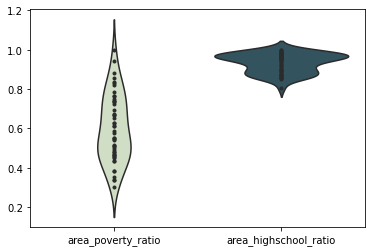

In [10]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)  #renk verir.
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

inner="points" parametresi şeklin içerisinde gördüğünüz noktalardır. Bu noktaların her biri veri setinde bir değerdir. Mesela data içerisine bakalım:

In [11]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


Çıktıda gördüğünüz area_poverty_ratio sütununun ilk satırındaki değer 0.3 ve ikinci satırdaki değer 0.33 dür. Figüre baktığınıda sol taraftaki şekilde y ekseni 0.3 e karşılık gelen noktaya bakın ve 0.33 de bu noktanın hemen üstünde.

Sol tataftaki şeklin enine en şişman olduğu kısım yaklaşık 0.5 değerine karşılık gelir. Bunun anlamı, area_poverty_ratio sütunundaki değerler arasında en çok bulunan sayı yaklaşık 0.5 tir.

Sağ taraftaki şeklin enine en şişman olduğu kısım yaklaşık 0.99 değerine karşılık gelir. Bunun anlamı, area_highschool_ratio sütunundaki değerler arasında en çok bulunan sayı yaklaşık 0.99'dur.